Feature names: ['petal length (cm)', 'petal width (cm)']
Target names: ['setosa', 'versicolor']
Data shape: (100, 2)
Support Vectors: [[1.9 0.4]
 [3.  1.1]]


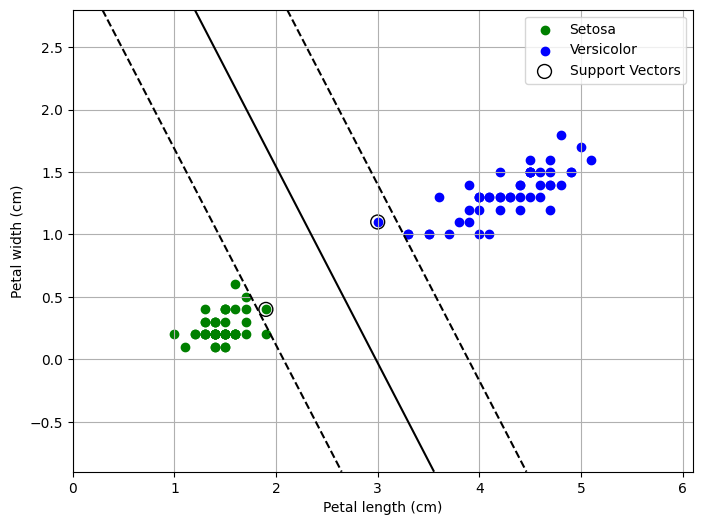

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[iris.target != 2, 2:4]
y = iris.target[iris.target != 2]

# 데이터 정보 출력
print("Feature names:", ['petal length (cm)', 'petal width (cm)'])  # 특성 이름 출력
print("Target names:", ['setosa', 'versicolor'])  # 타깃 이름 출력
print("Data shape:", X.shape)  # 데이터 크기 출력

# 모델 학습
model = SVC(kernel="linear")  # 선형 SVM 모델 생성
model.fit(X, y)  # 모델 학습

print("Support Vectors:", model.support_vectors_)

# 결정 경계 시각화
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# 예측
data_points = np.c_[xx.ravel(), yy.ravel()]
z = model.decision_function(data_points).reshape(xx.shape)

# 결정경계
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="green", label="Setosa")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="blue", label="Versicolor")
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black', label="Support Vectors")
plt.contour(xx, yy, z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors="black")

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()
plt.grid()
plt.show()